In [1]:
pip install pmdarima

     |████████████████████████████████| 1.5MB 5.6MB/s 
     |████████████████████████████████| 2.1MB 21.8MB/s 
     |████████████████████████████████| 9.5MB 39.7MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read Data

In [23]:
#df=pd.read_csv('/content/MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
#df=df.dropna()
df = pd.read_csv('dataset.csv', index_col= "Date", parse_dates=True)
df = df[:108]
df.columns = ['Int','For','HK','TW']
print('Shape of data',df.shape)
#print('Shape of data1',df1.shape)
df.tail()

Shape of data (108, 4)


,Int,For,HK,TW
Date,,,,
2019-08-31,71.03,54.03,6.04,10.96
2019-09-30,77.12,61.66,5.66,9.80
2019-10-31,87.02,68.18,6.84,12.00
2019-11-30,84.48,66.94,6.70,10.84
2019-12-31,73.00,56.81,6.75,9.44


#Plot Your Data

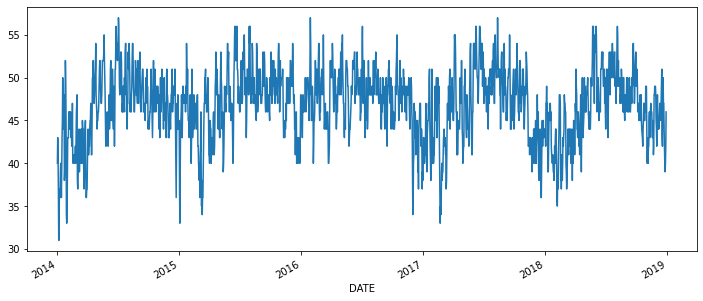

In [ ]:
df['AvgTemp'].plot(figsize=(12,5))

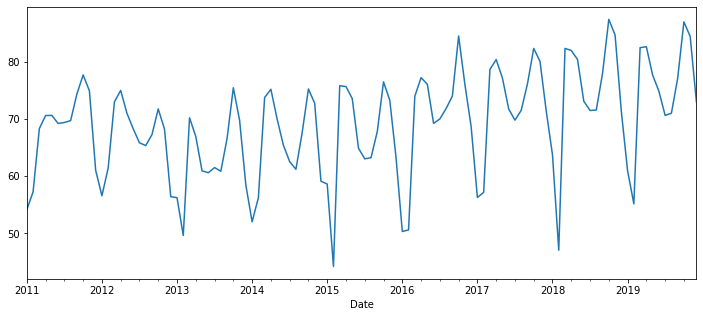

In [24]:
df['Int'].plot(figsize=(12,5))

#Check For Stationarity

In [7]:
from statsmodels.tsa.stattools import adfuller
#使用adfuller 检查给定的数据集是否稳定
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

为了确定数据的性质，我们将使用原假设。

H0：零假设：这是一个关于总体的陈述，或者被认为是正确的，或者被用来提出一个论点，除非在合理的怀疑之前可以证明它是不正确的。

H1：另一种假设：关于总体的主张与H 0和我们拒绝H 0时得出的结论矛盾。

Ho：不平稳

H1：静止我们将考虑数据不是平稳的原假设和数据是平稳的替代假设。


In [8]:
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068777
2. P-Value :  8.675937480199653e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [25]:
adf_test(df['Int'])

1. ADF :  -0.5753977022944081
2. P-Value :  0.8764448010913443
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 94
5. Critical Values :
	 1% :  -3.5019123847798657
	 5% :  -2.892815255482889
	 10% :  -2.583453861475781


'ADF测试统计'，'p值'，'使用13滞后'，'观察数'
p值大于0.05，这意味着数据正在接受原假设，这意味着数据是不稳定的。

#Figure Out Order for ARIMA Model

In [11]:
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [12]:
stepwise_fit = auto_arima(df['AvgTemp'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.480
Date:                Sun, 18 Apr 2021   AIC                           8294.960
Time:                        05:10:47   BIC                           8339.017
Sample:                             0   HQIC                          8311.213
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2633      0.374      3.377      0.001       0.530       1.996
ar.L1          0.9729      0.008    120.958      0.000       0.957       0.989
ma.L1         -0.1266      0.024     -5.344      0.000      -0.173      -0.080
ma.L2         -0.2167      0.024     -8.987      0.000      -0.264      -0.169
ma.L3         -0.2038      0.024     -8.546      0.000      -0.251      -0.157
ma.L4         -0.1400      0.023     -6.164      0.000      -0.184      -0.095
ma.L5         -0.0471      0.024     -1.937      0.053      -0.095       0.001
sigma2         5.4837      0.171     32.032      0.000       5.148       5.819
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.67
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
stepwise_fit = auto_arima(df['Int'], 
                          suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(3, 1, 1)   Log Likelihood                -353.147
Date:                Sun, 18 Apr 2021   AIC                            716.293
Time:                        05:14:58   BIC                            729.657
Sample:                             0   HQIC                           721.711
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3573      0.086      4.178      0.000       0.190       0.525
ar.L2         -0.2650      0.116     -2.292      0.022      -0.492      -0.038
ar.L3         -0.4117      0.138     -2.977      0.003      -0.683      -0.141
ma.L1         -0.8281      0.076    -10.853      0.000      -0.978      -0.679
sigma2        42.0197      5.762      7.292      0.000      30.726      53.313
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 8.45
Prob(Q):                              0.84   Prob(JB):                         0.01
Heteroskedasticity (H):               1.70   Skew:                            -0.39
Prob(H) (two-sided):                  0.12   Kurtosis:                         4.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima_model import ARIMA

#Split Data into Training and Testing

In [27]:
print(df.shape)
train=df.iloc[:-12]
test=df.iloc[-12:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(108, 4)
(96, 4) (12, 4)
Int    60.95
For    47.55
HK      5.18
TW      8.22
Name: 2019-01-31 00:00:00, dtype: float64 Int    73.00
For    56.81
HK      6.75
TW      9.44
Name: 2019-12-31 00:00:00, dtype: float64


## Train the Model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1821
Model:                     ARMA(1, 5)   Log Likelihood               -4138.130
Method:                       css-mle   S.D. of innovations              2.347
Date:                Fri, 18 Sep 2020   AIC                           8292.261
Time:                        04:23:48   BIC                           8336.318
Sample:                             0   HQIC                          8308.514
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.5293      0.787     59.148      0.000      44.988      48.071
ar.L1.AvgTemp     0.9860      0.006    155.004      0.000       0.974       0.998
ma.L1.AvgTemp    -0.1403      0.024     -5.754      0.000      -0.188      -0.092
ma.L2.AvgTemp    -0.2328      0.024     -9.641      0.000      -0.280      -0.185
ma.L3.AvgTemp    -0.2163      0.025     -8.502      0.000      -0.266      -0.166
ma.L4.AvgTemp    -0.1478      0.023     -6.352      0.000      -0.193      -0.102
ma.L5.AvgTemp    -0.0587      0.024     -2.413      0.016      -0.106      -0.011
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0142           +0.0000j            1.0142            0.0000
MA.1            1.0867           -0.0000j            1.0867           -0.0000
MA.2            0.0537           -1.8503j            1.8511           -0.2454
MA.3            0.0537           +1.8503j            1.8511            0.2454
MA.4           -1.8566           -1.0630j            2.1394           -0.4172
MA.5           -1.8566           +1.0630j            2.1394            0.4172
-----------------------------------------------------------------------------
"""

In [28]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Int'],order=(3,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Int   No. Observations:                   95
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -313.081
Method:                       css-mle   S.D. of innovations              6.442
Date:                Sun, 18 Apr 2021   AIC                            638.163
Time:                        05:16:51   BIC                            653.486
Sample:                    02-28-2011   HQIC                           644.354
                         - 12-31-2018                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1030      0.094      1.100      0.271      -0.080       0.286
ar.L1.D.Int     0.3538      0.108      3.275      0.001       0.142       0.566
ar.L2.D.Int    -0.2510      0.097     -2.596      0.009      -0.440      -0.062
ar.L3.D.Int    -0.4148      0.103     -4.032      0.000      -0.616      -0.213
ma.L1.D.Int    -0.8274      0.085     -9.714      0.000      -0.994      -0.660
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.6030           -0.9837j            1.1538           -0.1625
AR.2            0.6030           +0.9837j            1.1538            0.1625
AR.3           -1.8111           -0.0000j            1.8111           -0.5000
MA.1            1.2086           +0.0000j            1.2086            0.0000
-----------------------------------------------------------------------------
"""

#Make Predictions on Test Set

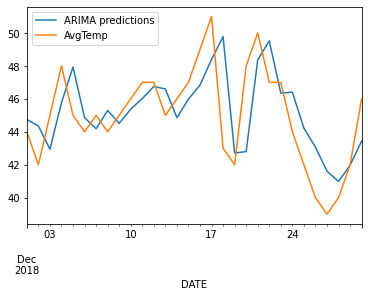

In [ ]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)


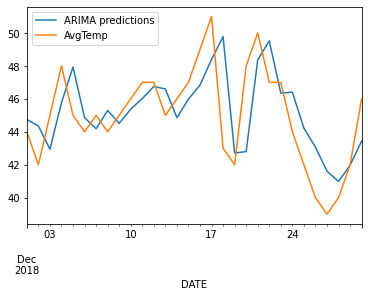

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['AvgTemp'].plot(legend=True)

In [ ]:
test['AvgTemp'].mean()

45.0

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)


2.326343714317439


In [ ]:
model2=ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


下面是自己的数据

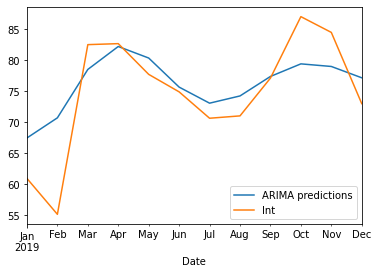

In [58]:
start=len(train)
end=len(train)+len(test)-1
#if the predicted values dont have date values as index, you will have to uncomment the following two commented lines to plot a graph
#index_future_dates=pd.date_range(start='2018-12-01',end='2018-12-30')
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Int'].plot(legend=True)

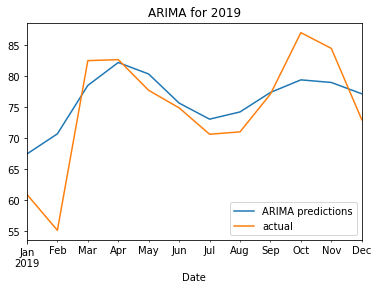

In [61]:
pred.plot(legend='ARIMA Predictions')
test['Int'].plot(legend=True, label='actual')
plt.title('ARIMA for 2019')
plt.savefig('ARIMA2019.pdf',dpi=500,bbox_inches='tight')

In [31]:
test['Int'].mean()

74.76833333333333

In [32]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Int']))
print(rmse)

5.9832999032209795


In [45]:
predict = pred.values
actual = df.head(108).Int.values
pred

2020-01-31    68.557760
2020-02-29    71.121670
2020-03-31    77.994787
2020-04-30    81.744511
2020-05-31    80.378777
2020-06-30    76.228519
2020-07-31    73.677162
2020-08-31    74.515456
2020-09-30    77.295027
2020-10-31    79.240468
2020-11-30    78.996794
2020-12-31    77.389028
Freq: M, Name: ARIMA Predictions, dtype: float64

In [47]:
error = 0
summery = 0
for i in range(12):
    error += abs(predict[i] - actual[i])
    summery += actual[i]
acc = 1 - error/summery
acc

0.8782123136284371

In [49]:
#MAPE
error = 0
for i in range(12):
    error += abs((actual[i] - predict[i])/actual[i])
    
MAPE = error/12
MAPE

0.12957578980637002

In [51]:
error = 0
for i in range(12):
  error += (actual[i] - predict[i])*(actual[i] - predict[i])

RMSE = math.sqrt(error/12)
RMSE

9.550063808063529

In [34]:
model2=ARIMA(df['Int'],order=(3,1,1))
model2=model2.fit()
df.tail()

,Int,For,HK,TW
Date,,,,
2019-08-31,71.03,54.03,6.04,10.96
2019-09-30,77.12,61.66,5.66,9.80
2019-10-31,87.02,68.18,6.84,12.00
2019-11-30,84.48,66.94,6.70,10.84
2019-12-31,73.00,56.81,6.75,9.44


#For Future Dates

In [63]:
index_future_dates=pd.date_range(start='2018-12-30',end='2019-01-29')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

ValueError: ignored

In [41]:
np.savetxt('experiment_data_ARIMA.csv',pred,delimiter=',')

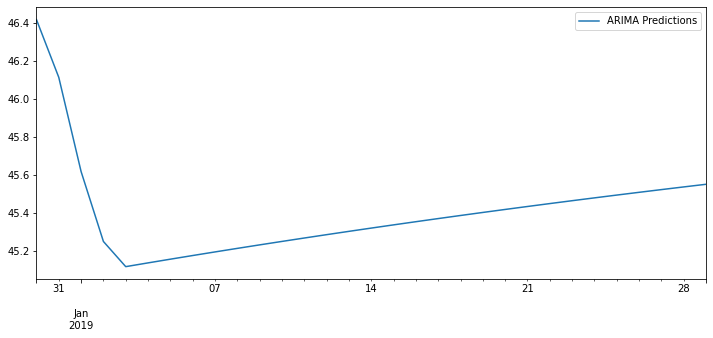

In [ ]:
pred.plot(figsize=(12,5),legend=True)


下面是自己的数据

In [39]:
index_future_dates=pd.date_range(start='2020-01-01',end='2020-12-31',freq='M')
#print(index_future_dates)
pred=model2.predict(start=len(df),end=len(df)+11,typ='levels').rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-01-31    68.557760
2020-02-29    71.121670
2020-03-31    77.994787
2020-04-30    81.744511
2020-05-31    80.378777
2020-06-30    76.228519
2020-07-31    73.677162
2020-08-31    74.515456
2020-09-30    77.295027
2020-10-31    79.240468
2020-11-30    78.996794
2020-12-31    77.389028
Freq: M, Name: ARIMA Predictions, dtype: float64


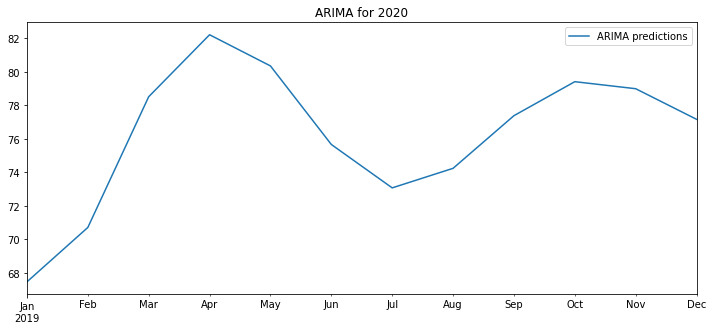

In [62]:
pred.plot(figsize=(12,5),legend=True)
plt.title('ARIMA for 2020')
plt.savefig('ARIMA2020.pdf',dpi=500,bbox_inches='tight')